# Importing Libraries

In [137]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas_profiling
import statsmodels.api as sm

In [96]:
df_patient_system = pd.read_csv('Patient_per_System.csv')

In [97]:
df_patient_system.head()

,Date,Patients/ system,ARIMA_Predictions,Prophet_Predictions,LSTM_Predictions
0,2020-02-09,73.022021,60.113627,62.600817,76.208459
1,2020-02-16,73.499421,60.417891,63.862872,78.014972
2,2020-02-23,72.934013,60.722156,65.084217,79.928238
3,2020-03-01,73.082824,61.026420,66.346273,82.134297
4,2020-03-08,72.904651,61.330684,67.567617,84.413957


In [98]:
#df_systems = pd.read_csv('Number_Systems.csv')
df_systems = pd.read_csv('Number_Systems_Forecasted.csv')

In [99]:
df_systems.head()

,Date,# of systems,ARIMA_Predictions,Prophet_Predictions,LSTM_Predictions
0,2020-02-09,869.285714,861.239307,765.836433,849.577405
1,2020-02-16,864.142857,854.322981,729.380380,845.758879
2,2020-02-23,855.142857,847.251021,694.100329,842.229667
3,2020-03-01,864.142857,840.023427,657.644276,838.822583
4,2020-03-08,860.000000,832.640200,622.364224,835.559730


In [100]:
df_sum_of_patients = pd.read_csv('Actual_Sum_Of_Patients.csv')

In [101]:
df_sum_of_patients.head()

,Date,Year,WeekNum,Sum of Patients,# of systems,Patients/ system,wk,Q,FirstDate,LastDate
0,2018-12-02,2018,49,49360.0,981.0,50.316004,49,4,2018-11-26,2018-12-02
1,2018-12-09,2018,50,50420.0,983.0,51.291963,50,4,2018-12-03,2018-12-09
2,2018-12-16,2018,51,53239.0,981.0,54.270133,51,4,2018-12-10,2018-12-16
3,2018-12-23,2018,52,48346.0,982.0,49.232179,52,4,2018-12-17,2018-12-23
4,2018-12-30,2018,53,8930.0,950.0,9.400000,53,5,2018-12-24,2018-12-30


# Multiplying the forecasted output of both the univariate models

In [102]:
df_final_patients = df_patient_system.merge(df_systems, on="Date", how = 'inner')

In [103]:
df_final_patients

,Date,Patients/ system,ARIMA_Predictions_x,Prophet_Predictions_x,LSTM_Predictions_x,# of systems,ARIMA_Predictions_y,Prophet_Predictions_y,LSTM_Predictions_y
0,2020-02-09,73.022021,60.113627,62.600817,76.208459,869.285714,861.239307,765.836433,849.577405
1,2020-02-16,73.499421,60.417891,63.862872,78.014972,864.142857,854.322981,729.380380,845.758879
2,2020-02-23,72.934013,60.722156,65.084217,79.928238,855.142857,847.251021,694.100329,842.229667
3,2020-03-01,73.082824,61.026420,66.346273,82.134297,864.142857,840.023427,657.644276,838.822583
4,2020-03-08,72.904651,61.330684,67.567617,84.413957,860.000000,832.640200,622.364224,835.559730
5,2020-03-15,70.896093,61.634948,68.829673,86.769934,859.285714,825.101339,585.908171,832.471239
6,2020-03-22,56.974138,61.939212,70.091728,89.250931,812.000000,817.406844,549.452118,829.547683
7,2020-03-29,43.570513,62.243476,71.313073,92.018800,735.428571,809.556716,514.172066,826.896016
8,2020-04-05,38.260860,62.547740,72.575128,94.934444,677.428571,801.550954,477.716013,824.403358
9,2020-04-12,37.193846,62.852004,73.796473,97.779693,650.000000,793.389558,442.435962,822.000726


# Forecasting the Sum of patients 

In [104]:
# Sum of Final patient Analysis
df_final_patients['Sum_of_Patients_Forecasted'] = df_final_patients.apply(lambda row: (row['LSTM_Predictions_x']*row['ARIMA_Predictions_y']),
                                   axis=1).round().astype(int)

In [105]:
df_final_patients

,Date,Patients/ system,ARIMA_Predictions_x,Prophet_Predictions_x,LSTM_Predictions_x,# of systems,ARIMA_Predictions_y,Prophet_Predictions_y,LSTM_Predictions_y,Sum_of_Patients_Forecasted
0,2020-02-09,73.022021,60.113627,62.600817,76.208459,869.285714,861.239307,765.836433,849.577405,65634
1,2020-02-16,73.499421,60.417891,63.862872,78.014972,864.142857,854.322981,729.380380,845.758879,66650
2,2020-02-23,72.934013,60.722156,65.084217,79.928238,855.142857,847.251021,694.100329,842.229667,67719
3,2020-03-01,73.082824,61.026420,66.346273,82.134297,864.142857,840.023427,657.644276,838.822583,68995
4,2020-03-08,72.904651,61.330684,67.567617,84.413957,860.000000,832.640200,622.364224,835.559730,70286
5,2020-03-15,70.896093,61.634948,68.829673,86.769934,859.285714,825.101339,585.908171,832.471239,71594
6,2020-03-22,56.974138,61.939212,70.091728,89.250931,812.000000,817.406844,549.452118,829.547683,72954
7,2020-03-29,43.570513,62.243476,71.313073,92.018800,735.428571,809.556716,514.172066,826.896016,74494
8,2020-04-05,38.260860,62.547740,72.575128,94.934444,677.428571,801.550954,477.716013,824.403358,76095
9,2020-04-12,37.193846,62.852004,73.796473,97.779693,650.000000,793.389558,442.435962,822.000726,77577


In [ ]:
# Based on the evaluation LSTM and ARIMA are considered as the two best ones

In [111]:
df_final_patients['Patients_system_Forecasted'] = df_final_patients['LSTM_Predictions_x']
df_final_patients['Total_Number_of_systems_Forecasted'] = df_final_patients['ARIMA_Predictions_y'].astype(int)

In [109]:
df_final_patients['# of systems'] = df_final_patients['# of systems'].astype(int)

In [113]:
df_final_sum_patients = df_final_patients[['Date','Patients/ system','# of systems','Patients_system_Forecasted','Total_Number_of_systems_Forecasted',
                                          'Sum_of_Patients_Forecasted']]
df_final_sum_patients


,Date,Patients/ system,# of systems,Patients_system_Forecasted,Total_Number_of_systems_Forecasted,Sum_of_Patients_Forecasted
0,2020-02-09,73.022021,869,76.208459,861,65634
1,2020-02-16,73.499421,864,78.014972,854,66650
2,2020-02-23,72.934013,855,79.928238,847,67719
3,2020-03-01,73.082824,864,82.134297,840,68995
4,2020-03-08,72.904651,860,84.413957,832,70286
5,2020-03-15,70.896093,859,86.769934,825,71594
6,2020-03-22,56.974138,812,89.250931,817,72954
7,2020-03-29,43.570513,735,92.018800,809,74494
8,2020-04-05,38.260860,677,94.934444,801,76095
9,2020-04-12,37.193846,650,97.779693,793,77577


In [114]:
df_patients = df_final_sum_patients.merge(df_sum_of_patients, on=['Date','# of systems','Patients/ system'], how = 'inner')


/Users/rahul.b.sarkar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:1100: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [115]:
df_patients = df_patients.drop(['FirstDate','LastDate'], axis = 1)

In [116]:
df_patients

,Date,Patients/ system,# of systems,Patients_system_Forecasted,Total_Number_of_systems_Forecasted,Sum_of_Patients_Forecasted,Year,WeekNum,Sum of Patients,wk,Q
0,2020-03-08,72.904651,860,84.413957,832,70286,2020,10,62698.0,10,1
1,2020-03-22,56.974138,812,89.250931,817,72954,2020,12,46263.0,12,1
2,2020-04-12,37.193846,650,97.779693,793,77577,2020,15,24176.0,15,2
3,2020-04-26,0.000000,0,104.257761,776,80967,2020,17,0.0,17,2
4,2020-05-03,0.000000,0,107.873418,767,82844,2020,18,0.0,18,2
5,2020-05-10,0.000000,0,111.676944,759,84784,2020,19,0.0,19,2
6,2020-05-17,0.000000,0,115.783029,750,86866,2020,20,0.0,20,2
7,2020-05-24,0.000000,0,120.265847,741,89135,2020,21,0.0,21,2
8,2020-05-31,0.000000,0,125.169387,731,91612,2020,22,0.0,22,2
9,2020-06-07,0.000000,0,130.686057,722,94420,2020,23,0.0,23,2


In [117]:
df_patients.to_csv('Final_Sum_Of_Patients.csv')

# EDA Report

In [129]:
pfr = pandas_profiling.ProfileReport(df_patients)
pfr.to_file("sumofpatients.html")

In [128]:
pfr

In [134]:
df_trendforecast = df_patients.copy
df_trendforecast = df_patients.set_index("Date")

# Seasonal Decomposition - Trend & Seasonality

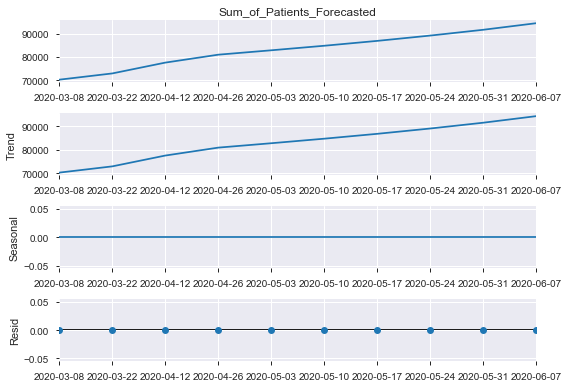

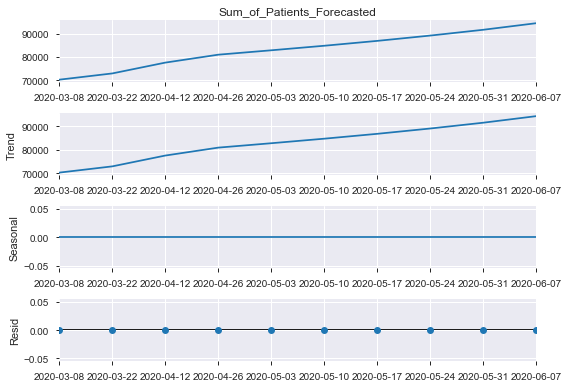

In [144]:

result_patients = seasonal_decompose(df_trendforecast['Sum_of_Patients_Forecasted'].head(10), model='additive', freq=1)
result_patients.plot()

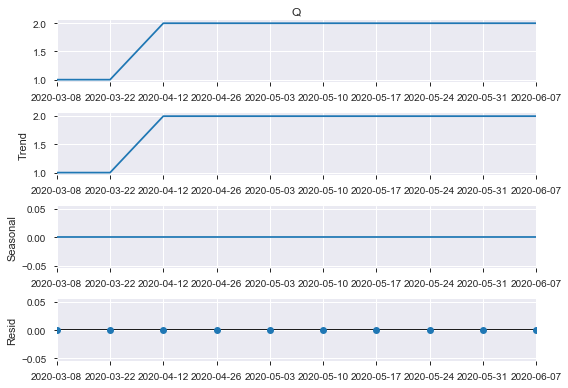

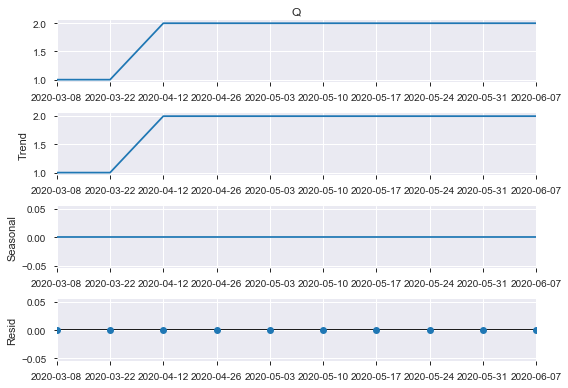

In [149]:

result_patients_quarter = seasonal_decompose(df_trendforecast['Q'].head(10), model='additive', freq=1)
result_patients_quarter.plot()

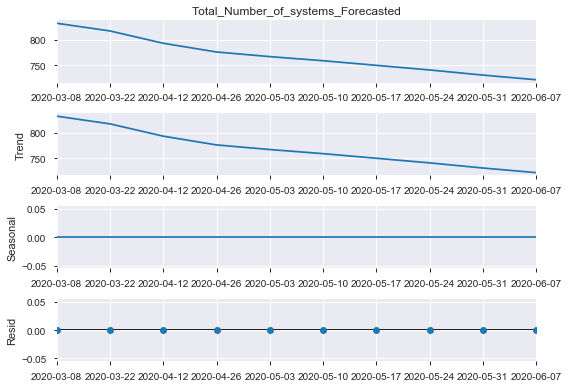

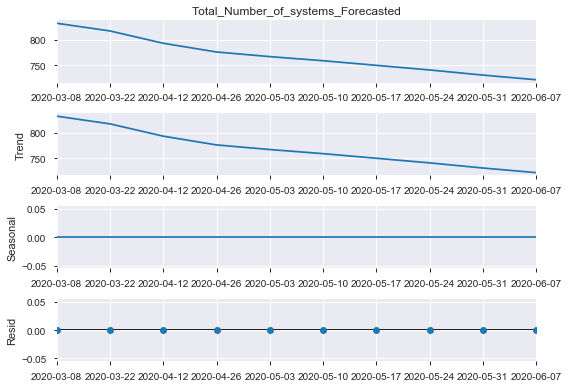

In [145]:

numberof_systems = seasonal_decompose(df_trendforecast['Total_Number_of_systems_Forecasted'].head(10), model='additive', freq=1)
numberof_systems.plot()


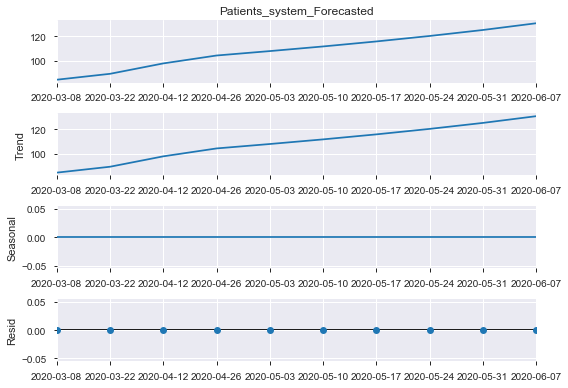

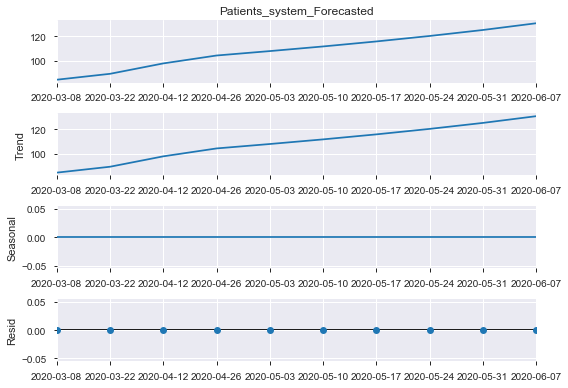

In [146]:

patient_system_result = seasonal_decompose(df_trendforecast['Patients_system_Forecasted'].head(10), model='additive', freq=1)
patient_system_result.plot()

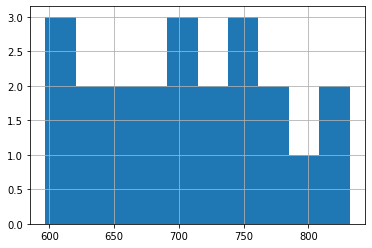

In [122]:
df_patients['Total_Number_of_systems_Forecasted'].hist()

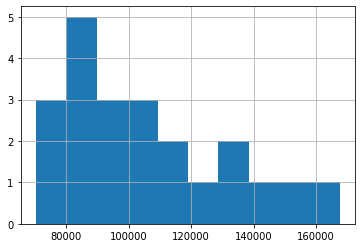

In [124]:
df_patients['Sum_of_Patients_Forecasted'].hist()

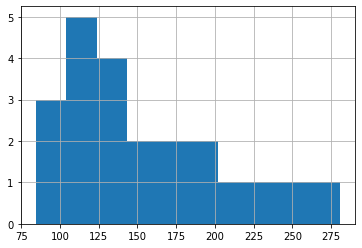

In [125]:
df_patients['Patients_system_Forecasted'].hist()

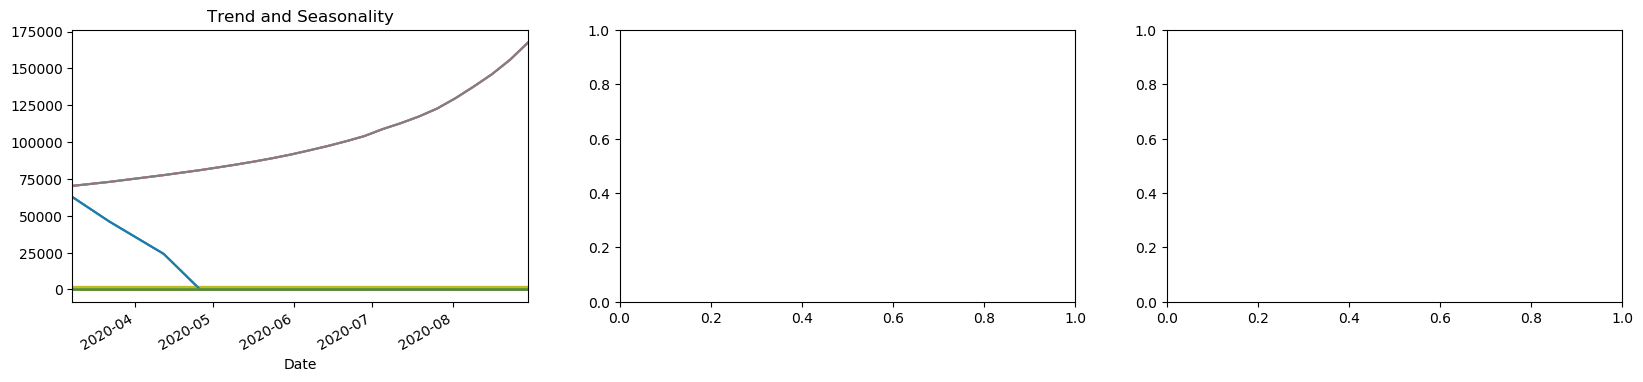

In [94]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('Final_Sum_Of_Patients.csv', parse_dates=['Date'], index_col='Date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('Final_Sum_Of_Patients.csv', parse_dates=['Date'], index_col='Date').plot(title='Seasonality Only', legend=False, ax=axes[0])

pd.read_csv('Final_Sum_Of_Patients.csv', parse_dates=['Date'], index_col='Date').plot(title='Trend and Seasonality', legend=False, ax=axes[0])